<a href="https://colab.research.google.com/github/hecaguayo/Tarea1MLFBI/blob/master/Tarea_1_MLBI_2020FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea 1 de MLBI 2020-1**
Hector Aguayo & Fabián Segura

#EJERCICIO 1

 **Enunciado:**

El set de datos 1 contiene información respecto a los estudiantes que han ingresado a la faculta de ingeniería. Se le pide que implemente una regresión logística que permita aprender a clasificar a que cluster pertenece cada alumno de acuerdo la información que se entrega. Recuerde que por convención la última columna del set de datos representa la señal que usted quiere aprender. También tenga en cuenta que las clases están desbalanceadas y que se espera que usted utilice 80% de los datos para entrenar y el 20% restante para testear. 

Además, presente una matriz de confusión y el f1-score. 

 ## Preparación
Cargamos las librerias necesarias para la elaboración.

In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import os
import logging
os.environ['TF_CPP_MIN_VLOG_LEVEL'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
logging.getLogger("tensorflow").setLevel(logging.WARNING)

import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten, Dense
tf.get_logger().setLevel("ERROR")
tf.autograph.set_verbosity(2)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("TensorFlow version: ", tf.__version__)

TensorFlow version:  2.2.0-rc3


 A continuación, se carga el conjunto de datos desde Github.

In [0]:
url = 'https://github.com/FxknTT/TareaMLBI1/blob/master/dataset1.xlsx?raw=true'
dataset = pd.read_excel(url)

 ## Limpieza de los datos

Se presencia variables que son categoricas por lo cual hay que cambiarlas a valores númericos.

Primero transformamos las variables de carreras a booleanas, teniendo cada carrera una columna

In [0]:
carreras = pd.get_dummies(dataset['crr_Nom'],prefix="Carrera")
X=dataset.drop(labels=['crr_Nom', 'cluster'], axis=1)

Concatenamos estas variables booleanas a nuestra data

In [0]:
X = pd.concat([X, carreras], axis=1)

Además le damos la información de los cluster a las y

In [0]:
y = dataset['cluster']

Luego hacemos que los cluster coincidan con los indices de los arrays.

*   C1 = 0
*   C2 = 1
*   C3 = 2
*   C4 = 3

In [0]:
y = y.replace(['C1'], 0)
y = y.replace(['C2'], 1)
y = y.replace(['C3'], 2)
y = y.replace(['C4'], 3)
y.head()

0    1
1    0
2    2
3    1
4    1
Name: cluster, dtype: int64

Observamos nuestros datos

In [0]:
print(X.head())
print(y.head())

   psu_Nem  ...  Carrera_INGENIERÍA CIVIL DE MINAS
0      783  ...                                  0
1      799  ...                                  0
2      688  ...                                  0
3      605  ...                                  0
4      603  ...                                  0

[5 rows x 28 columns]
0    1
1    0
2    2
3    1
4    1
Name: cluster, dtype: int64


 ### Paso 1: Standarización de datos

Como se puyede ver las escalas de los datos son muy diferentes, los atributos varían mucho y en machine learning esto es perjudicial para que los modelos obtengan valores razonables.

Por lo cual se estandizaran los valores de los datos usando `StandardScaler`. 

Además usaremos esta herramienta para separar los datos `train_test_split`


In [0]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify = y) #Dibidimos en 80% entrenamiento y 20% testeo.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.67829316, -0.07778272, -0.30892258, ..., -0.28640746,
        -0.28835194, -0.18809386],
       [-2.40729041, -1.38038018,  0.85514198, ..., -0.28640746,
        -0.28835194, -0.18809386],
       [-0.02294743, -1.59492565,  0.29074704, ..., -0.28640746,
        -0.28835194, -0.18809386],
       ...,
       [ 1.05070409, -0.01648401,  0.02618691, ..., -0.28640746,
         3.4679843 , -0.18809386],
       [ 1.32957462,  2.46611351,  0.62585654, ..., -0.28640746,
        -0.28835194, -0.18809386],
       [ 0.61845478, -0.49154897, -0.09727448, ..., -0.28640746,
        -0.28835194, -0.18809386]])

 ### Paso 2: Creamos nuestra neurona

 A continuación, definiremos nuestro modelo el cual es un modelo de manera sequencial, que tiene una primera capa de input para luego salir en una capa de salida con softmax, el cual nos encasilla en una de las clases.

In [0]:
model = Sequential()
model.add(Dense(X.shape[1], activation='relu', input_dim = X.shape[1]))
model.add(Dense(4, activation = 'softmax'))


Ocuparemos el optimizador `adam`, la función de perdida `sparse_categorical_crossentropy`, el cual nos dice si fue bien encasillada en la clase y la metrica a ocupar es `accuracy` que es cuántas variables encasillamos bien.

In [0]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

 ### Paso 5: Entrena el modelo

In [0]:
Entrenamos el modelo con nuestras variables de entrenamiento, y le damos un batch size de 10 y realizaremos 20 ejercicios.

In [0]:
model.fit(X_train, y_train.to_numpy(), batch_size=10, epochs=20, verbose=1)

Epoch 1/20
630/630 [==============================] - 1s 1ms/step - loss: 0.8253 - accuracy: 0.6400
Epoch 2/20
630/630 [==============================] - 1s 1ms/step - loss: 0.4970 - accuracy: 0.7953
Epoch 3/20
630/630 [==============================] - 1s 1ms/step - loss: 0.4354 - accuracy: 0.8175
Epoch 4/20
630/630 [==============================] - 1s 1ms/step - loss: 0.4061 - accuracy: 0.8269
Epoch 5/20
630/630 [==============================] - 1s 1ms/step - loss: 0.3865 - accuracy: 0.8349
Epoch 6/20
630/630 [==============================] - 1s 1ms/step - loss: 0.3732 - accuracy: 0.8446
Epoch 7/20
630/630 [==============================] - 1s 1ms/step - loss: 0.3625 - accuracy: 0.8508
Epoch 8/20
630/630 [==============================] - 1s 1ms/step - loss: 0.3511 - accuracy: 0.8538
Epoch 9/20
630/630 [==============================] - 1s 1ms/step - loss: 0.3452 - accuracy: 0.8546
Epoch 10/20
630/630 [==============================] - 1s 1ms/step - loss: 0.3371 - accuracy: 0.8565

 ### Paso 6: Evalúa el modelo

A modo de visualización primaria vemos si predijo bien

In [0]:
y_pred = model.predict_classes(X_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([2, 0, 2, ..., 1, 1, 1])

In [0]:
y_test

3429    2
781     0
7540    2
5035    1
3035    2
       ..
1060    2
6010    2
6061    3
5953    1
139     1
Name: cluster, Length: 1574, dtype: int64

Analizamos el rendimiento del modelo con las variables de testeo

In [0]:
model.evaluate(X_test, y_test.to_numpy())

50/50 [==============================] - 0s 1ms/step - loss: 0.3500 - accuracy: 0.8469


[0.3499736785888672, 0.846886932849884]

Tenemos un accuracy del 85%, lo cual es aceptable.

Desde sklearn importamos la api de la matriz de confusión la cual nos presenta

In [0]:
from sklearn.metrics  import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))

accuracy_score(y_test, y_pred)


[[230  36   0   0]
 [ 36 629  48  14]
 [  0  35 297  23]
 [  0  17  32 177]]


0.8468869123252859

De la cual podemos ver las clasificaciones que fueron acertas y las que no en donde fueron clasificadas.

Ahora veremos el f-1 score, el cual lo calcularemos bajo el parametro de micro, el que calcula las metricas globales contando el total de verdaderos positivos, falsos negativos y falsos positivos.



In [0]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.8468869123252859

#EJERCICIO 2

##Preparación

Cargamos nuestro dataframe desde colab

In [0]:
url = 'https://raw.githubusercontent.com/hecaguayo/Tarea1MLFBI/master/dataset2%5B1%5D.csv'
dataset2 = pd.read_csv(url)

Visualizamos si los datos fueron cargados correctamente

In [6]:
dataset2.head()

,x,y,condition
0,7391.708670,5.898348e+06,1
1,48438.984252,5.946210e+06,1
2,-2768.592216,5.946243e+06,1
3,41644.498119,5.915993e+06,1
4,53467.799848,5.953068e+06,1


Visualiamos los datos mediante seaborn pairplot

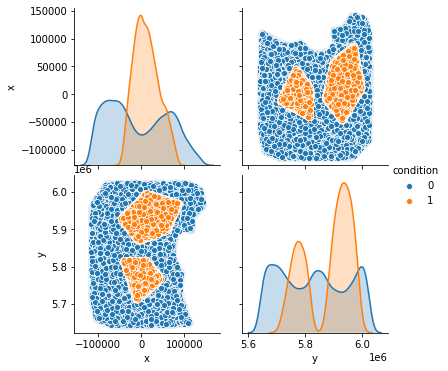

In [7]:
sns.pairplot(dataset2, hue='condition')

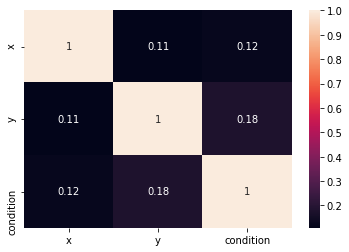

In [8]:
sns.heatmap(dataset2.corr(), annot=True)

Asignamos nuestros dataset X e Y, donde X son las variables que utilizaremos para asignar las variables Y

In [0]:
X=dataset2.drop(labels=['condition'], axis=1)
y=dataset2['condition']

##Paso 1: Standarización de datos y creación de los set de entrenamiento y testeo

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #Dividimos en 80% entrenamiento y 20% testeo.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 1.46406838, -0.69268078],
       [ 0.80791725,  1.25074007],
       [ 0.03345593,  1.05261785],
       ...,
       [ 0.33973832, -0.60820715],
       [-0.85493183,  1.23440792],
       [ 0.93092755,  1.58280032]])

##Paso 2: Creación de neurona

In [0]:
model = Sequential()
model.add(Dense(9, activation='relu', input_dim=2))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

##Paso 3: Entrenamiento de modelo

In [0]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train.to_numpy(), batch_size=20, epochs=10, verbose=1)

Epoch 1/10
3266/3266 [==============================] - 4s 1ms/step - loss: 0.3297 - accuracy: 0.8263
Epoch 2/10
3266/3266 [==============================] - 4s 1ms/step - loss: 0.2590 - accuracy: 0.8751
Epoch 3/10
3266/3266 [==============================] - 4s 1ms/step - loss: 0.2273 - accuracy: 0.8977
Epoch 4/10
3266/3266 [==============================] - 4s 1ms/step - loss: 0.1901 - accuracy: 0.9293
Epoch 5/10
3266/3266 [==============================] - 4s 1ms/step - loss: 0.1464 - accuracy: 0.9625
Epoch 6/10
3266/3266 [==============================] - 4s 1ms/step - loss: 0.1156 - accuracy: 0.9714
Epoch 7/10
3266/3266 [==============================] - 4s 1ms/step - loss: 0.0976 - accuracy: 0.9744
Epoch 8/10
3266/3266 [==============================] - 4s 1ms/step - loss: 0.0861 - accuracy: 0.9765
Epoch 9/10
3266/3266 [==============================] - 4s 1ms/step - loss: 0.0777 - accuracy: 0.9779
Epoch 10/10
3266/3266 [==============================] - 4s 1ms/step - loss: 0.071

##Paso 4: Evaluación del modelo

In [17]:
y_pred = model.predict_classes(X_test)
y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [18]:
y_test

30587    0
20002    0
2327     1
45242    0
28793    0
        ..
64514    0
73895    0
79131    0
23638    0
68627    0
Name: condition, Length: 16330, dtype: int64

Aquí nos percatamos que el resulto obtenido por el modelo es acertado.

In [19]:
model.evaluate(X_test, y_test)

511/511 [==============================] - 1s 1ms/step - loss: 0.0688 - accuracy: 0.9816


[0.06883596628904343, 0.9815676808357239]